In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [142]:
data = pd.read_csv('./stats/dataClean v2.csv')
data.head()

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,totalSEE,numMedCond,EthCat,backpain,depression,highBP,falling_1,falling_2,falling_3,fallsBin
0,18.752067,-0.275275,0.27,0.631539,0.058177,66.356510,29.013062,174.921910,92.965645,173.194095,...,7.333333,3,1,0,0,0,5,0,0,0
1,13.346667,-0.216883,0.37,0.395926,0.071269,69.628002,26.293871,188.856174,110.926374,184.429725,...,4.666667,0,1,0,0,0,0,0,0,0
2,9.175833,0.108442,0.54,0.152175,0.044839,80.953823,30.219053,181.651735,96.723395,180.520050,...,2.888889,0,1,0,0,0,1,0,0,0
3,13.791667,0.133333,0.36,0.234965,0.031573,72.900182,29.519413,184.377372,103.622265,180.242772,...,6.777778,0,1,0,0,0,2,1,0,0
4,11.444767,-0.108442,0.44,0.225910,0.045701,71.881103,27.642812,186.287796,104.791805,179.420205,...,5.333333,0,1,0,0,0,2,0,0,0


In [145]:
# Data Loading
data = pd.read_csv("./stats/dataClean v2.csv")

# Converting Martial Status to Single and Not Single (due to the small number of samples in the other categories)
# Single -> 0, Not Single -> 1
data['Marital'] = data['Marital'].apply(lambda x: 1 if x in [1, 6] else 0)

data['Education'] = data['Education'].apply(lambda x: 0 if x == 5 else x-1 if x in [2, 3, 4] else x)
# Converting Education to One Hot Encoding
encoder = OneHotEncoder()
encoded_education = encoder.fit_transform(data[['Education']])
data_encoded = pd.concat([data.drop(['Education'], axis=1), pd.DataFrame(encoded_education.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# Converting Ethinicity to White, Asians and Others
# White -> 1, Asian -> 2, Others -> 3
data['EthCat'] = data['EthCat'].apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3)
# Converting Ethnicity to One Hot Encoding
encoder = OneHotEncoder()
encoded_ethnicity = encoder.fit_transform(data[['EthCat']])
data_encoded = pd.concat([data.drop(['EthCat'], axis=1), pd.DataFrame(encoded_ethnicity.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

# For Employment, a value of 10 mean prefer not to answer so change these to 0
data['Employment'] = data['Employment'].apply(lambda x: 0 if x == 10 else x)
# Converting Employment to One Hot Encoding
encoded_employment = encoder.fit_transform(data[['Employment']])
data_encoded = pd.concat([data.drop(['Employment'], axis=1), pd.DataFrame(encoded_employment.toarray(), columns=encoder.get_feature_names_out())], axis=1)
data = data_encoded

In [146]:
list(data.columns)

['time',
 'time_diff',
 'speed',
 'time_sd',
 'speed_sd',
 'left_knee_range_mean',
 'left_knee_sd',
 'left_knee_max',
 'left_knee_min',
 'left_knee_max_mean',
 'left_knee_min_mean',
 'left_knee_max_sd',
 'left_knee_min_sd',
 'left_knee_ang_vel',
 'left_knee_ang_acc',
 'left_knee_max_ang_vel',
 'left_knee_max_ang_acc',
 'left_knee_min_ang_vel',
 'left_knee_min_ang_acc',
 'right_knee_range_mean',
 'right_knee_sd',
 'right_knee_max',
 'right_knee_min',
 'right_knee_max_mean',
 'right_knee_min_mean',
 'right_knee_max_sd',
 'right_knee_min_sd',
 'right_knee_ang_vel',
 'right_knee_ang_acc',
 'right_knee_max_ang_vel',
 'right_knee_max_ang_acc',
 'right_knee_min_ang_vel',
 'right_knee_min_ang_acc',
 'left_hip_range_mean',
 'left_hip_sd',
 'left_hip_max',
 'left_hip_min',
 'left_hip_max_mean',
 'left_hip_min_mean',
 'left_hip_max_sd',
 'left_hip_min_sd',
 'left_hip_ang_vel',
 'left_hip_ang_acc',
 'left_hip_max_ang_vel',
 'left_hip_max_ang_acc',
 'left_hip_min_ang_vel',
 'left_hip_min_ang_acc',


In [100]:
data['Marital'] = data['Marital'].apply(lambda x: 1 if x in [1, 6] else 0)

In [101]:
# For Education, a value of 5 mean prefer not to answer so change these to 0
data['Education'] = data['Education'].apply(lambda x: 0 if x == 5 else x)
# Change 2 to 1 (High School), 3 to 2 (College) and 4 to 3 (Higher)
data['Education'] = data['Education'].apply(lambda x: x - 1 if x in [2, 3, 4] else x)

In [128]:
data['Employment'].value_counts()

Employment
1     190
5     129
6      33
2      25
8      13
3       6
4       3
7       3
10      3
Name: count, dtype: int64

In [121]:
data['Education'] = data['Education'].apply(lambda x: 0 if x == 5 else x-1 if x in [2, 3, 4] else x)

In [108]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['EthCat']])
data_encoded = pd.concat([data.drop(['EthCat'], axis=1), pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())], axis=1)

In [109]:
data_encoded.head()

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,totalSEE,numMedCond,Ethnicity,backpain,depression,highBP,fallsBin,EthCat_1,EthCat_2,EthCat_3
0,18.752067,-0.275275,0.27,0.631539,0.058177,66.356510,29.013062,174.921910,92.965645,173.194095,...,7.333333,3,1,0,0,0,0,1.0,0.0,0.0
1,13.346667,-0.216883,0.37,0.395926,0.071269,69.628002,26.293871,188.856174,110.926374,184.429725,...,4.666667,0,1,0,0,0,0,1.0,0.0,0.0
2,9.175833,0.108442,0.54,0.152175,0.044839,80.953823,30.219053,181.651735,96.723395,180.520050,...,2.888889,0,1,0,0,0,0,1.0,0.0,0.0
3,13.791667,0.133333,0.36,0.234965,0.031573,72.900182,29.519413,184.377372,103.622265,180.242772,...,6.777778,0,1,0,0,0,0,1.0,0.0,0.0
4,11.444767,-0.108442,0.44,0.225910,0.045701,71.881103,27.642812,186.287796,104.791805,179.420205,...,5.333333,0,1,0,0,0,0,1.0,0.0,0.0


In [105]:
data['EthCat'].value_counts()

EthCat
1    243
2    103
3     59
Name: count, dtype: int64

In [103]:
data['Ethnicity'].value_counts()

Ethnicity
1    243
4    103
0     24
3     16
2     14
7      3
8      2
Name: count, dtype: int64

In [104]:
data['EthCat'] = data['EthCat'].apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3)

In [92]:
# Create an instance of the OneHotEncoder with the desired column headers
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['Marital', 'EthCat']])

print(encoded_data.toarray().shape)

encoder.get_feature_names_out()

# Convert the encoded data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())

encoded_df.head()

# # Concatenate the encoded DataFrame with the original data
# data_encoded = pd.concat([data, encoded_df], axis=1)
for i in range(len(encoder.get_feature_names_out())):
    print(encoded_df[encoder.get_feature_names_out()[i]].value_counts())
# encoded_df[list(encoder.get_feature_names_out())[0]].value_counts()

(405, 13)
Marital_1
0.0    235
1.0    170
Name: count, dtype: int64
Marital_2
0.0    400
1.0      5
Name: count, dtype: int64
Marital_3
0.0    394
1.0     11
Name: count, dtype: int64
Marital_5
0.0    249
1.0    156
Name: count, dtype: int64
Marital_6
0.0    354
1.0     51
Name: count, dtype: int64
Marital_7
0.0    393
1.0     12
Name: count, dtype: int64
EthCat_1
1.0    243
0.0    162
Name: count, dtype: int64
EthCat_2
0.0    302
1.0    103
Name: count, dtype: int64
EthCat_3
0.0    391
1.0     14
Name: count, dtype: int64
EthCat_4
0.0    389
1.0     16
Name: count, dtype: int64
EthCat_6
0.0    402
1.0      3
Name: count, dtype: int64
EthCat_7
0.0    381
1.0     24
Name: count, dtype: int64
EthCat_8
0.0    403
1.0      2
Name: count, dtype: int64


In [48]:
data['fallsBin'].value_counts()

fallsBin
0    371
1     34
Name: count, dtype: int64

In [5]:
# Split the data into features (X) and labels (y)
X = data.drop('fallsBin', axis=1)
y = data['fallsBin']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

In [6]:
pd.DataFrame(X_train).describe()

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,totalMET,PA_cat,avgPEM,avgAAM,totalSEE,numMedCond,EthCat,backpain,depression,highBP
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,11.460217,-0.035087,0.477006,0.305932,0.060913,74.871281,28.054155,181.792907,100.436727,178.142960,...,3475.976481,1.737654,2.914903,4.366049,5.743484,0.401235,1.858025,0.070988,0.033951,0.055556
std,3.503449,0.172807,0.148462,0.221763,0.032443,13.503511,4.882256,10.004408,12.064819,6.924894,...,2562.125206,0.535723,0.507481,0.734945,2.223350,0.794407,1.596697,0.257201,0.181382,0.229416
min,4.273743,-1.076075,0.150000,0.023570,0.009127,39.348432,13.726089,150.001030,64.868991,141.057238,...,0.000000,0.000000,1.428571,2.200000,0.444444,0.000000,1.000000,0.000000,0.000000,0.000000
25%,9.127683,-0.135263,0.370000,0.145399,0.037761,66.729847,24.694803,177.868512,92.365629,174.022542,...,1662.000000,2.000000,2.571429,3.800000,4.222222,0.000000,1.000000,0.000000,0.000000,0.000000
50%,11.177833,0.000000,0.450000,0.264366,0.056956,74.830613,28.159856,182.267099,99.579881,178.991870,...,2883.250000,2.000000,2.857143,4.600000,5.666667,0.000000,1.000000,0.000000,0.000000,0.000000
75%,13.400888,0.066733,0.550000,0.405434,0.075844,82.008728,31.256137,185.802666,107.972854,182.347088,...,4707.500000,2.000000,3.285714,5.000000,7.472222,1.000000,2.000000,0.000000,0.000000,0.000000
max,32.875000,0.444444,1.170000,1.759357,0.197080,166.563105,43.483095,315.853310,139.121574,203.131355,...,17038.000000,2.000000,4.000000,6.000000,10.000000,4.000000,8.000000,1.000000,1.000000,1.000000


In [7]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_train_std = scaler.fit_transform(X_train)

In [8]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,516,517,518,519,520,521,522,523,524,525
count,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,...,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02
mean,-4.852086e-16,6.030841e-17,-1.480297e-16,1.027984e-16,4.221589e-16,3.618505e-16,-4.824673e-16,1.271959e-15,5.674473e-16,4.333982e-15,...,1.260994e-16,7.949745e-17,-2.193033e-16,3.289550e-17,-2.083381e-16,-3.289550e-17,-3.152485e-17,4.386066e-17,2.604227e-17,-6.304970e-17
std,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,...,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00
min,-2.054430e+00,-6.033317e+00,-2.206038e+00,-1.275230e+00,-1.598690e+00,-2.634707e+00,-2.939262e+00,-3.182702e+00,-2.952614e+00,-5.363705e+00,...,-1.358776e+00,-3.248588e+00,-2.933373e+00,-2.951785e+00,-2.387045e+00,-5.058557e-01,-5.382061e-01,-2.764271e-01,-1.874667e-01,-2.425356e-01
25%,-6.668119e-01,-5.805930e-01,-7.218814e-01,-7.250157e-01,-7.147180e-01,-6.038450e-01,-6.891379e-01,-3.928733e-01,-6.700127e-01,-5.959356e-01,...,-7.090919e-01,4.904617e-01,-6.778694e-01,-7.713842e-01,-6.852791e-01,-5.058557e-01,-5.382061e-01,-2.764271e-01,-1.874667e-01,-2.425356e-01
50%,-8.072624e-02,2.033568e-01,-1.821881e-01,-1.877267e-01,-1.221581e-01,-3.016301e-03,2.168365e-02,4.747164e-02,-7.113004e-02,1.227778e-01,...,-2.316996e-01,4.904617e-01,-1.139934e-01,3.188164e-01,-3.460381e-02,-5.058557e-01,-5.382061e-01,-2.764271e-01,-1.874667e-01,-2.425356e-01
75%,5.547883e-01,5.901272e-01,4.924285e-01,4.493770e-01,4.609130e-01,5.293799e-01,6.568553e-01,4.014192e-01,6.256028e-01,6.080428e-01,...,4.814083e-01,4.904617e-01,7.318205e-01,8.639167e-01,7.787403e-01,7.548924e-01,8.905569e-02,-2.764271e-01,-1.874667e-01,-2.425356e-01
max,6.121941e+00,2.779251e+00,4.675051e+00,6.564094e+00,4.203540e+00,6.800724e+00,3.165096e+00,1.342086e+01,3.211377e+00,3.614070e+00,...,5.301459e+00,4.904617e-01,2.141511e+00,2.226667e+00,1.917422e+00,4.537137e+00,3.852627e+00,3.617590e+00,5.334280e+00,4.123106e+00


In [9]:
# Create an instance of the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaler.fit(X_train)

X_train_mm = scaler.transform(X_train)

In [10]:
X_train_mm = pd.DataFrame(X_train_mm)
X_train_mm.columns = X_train.columns
X_train_mm.describe()

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,totalMET,PA_cat,avgPEM,avgAAM,totalSEE,numMedCond,EthCat,backpain,depression,highBP
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.251264,0.684626,0.320594,0.162671,0.275530,0.279235,0.481502,0.191688,0.479010,0.597443,...,0.204013,0.868827,0.578018,0.570013,0.554551,0.100309,0.122575,0.070988,0.033951,0.055556
std,0.122493,0.113650,0.145551,0.127759,0.172614,0.106147,0.164071,0.060321,0.162483,0.111558,...,0.150377,0.267861,0.197354,0.193407,0.232676,0.198602,0.228100,0.257201,0.181382,0.229416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169711,0.618744,0.215686,0.070186,0.152350,0.215238,0.368609,0.168026,0.370312,0.531064,...,0.097547,1.000000,0.444444,0.421053,0.395349,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.241391,0.707702,0.294118,0.138724,0.254477,0.278916,0.485054,0.194547,0.467470,0.611118,...,0.169225,1.000000,0.555556,0.631579,0.546512,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.319117,0.751591,0.392157,0.219994,0.354968,0.335341,0.589107,0.215865,0.580503,0.665170,...,0.276294,1.000000,0.722222,0.736842,0.735465,0.250000,0.142857,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X_test_mm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Training set percentage: 9.09 %
Test set percentage: 9.46 %


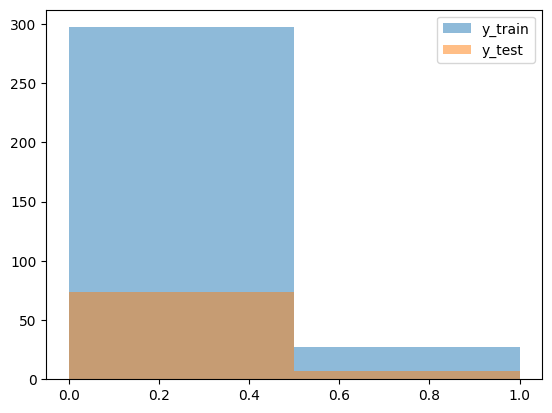

In [12]:
plt.hist(y_train, bins=2, alpha=0.5, label='y_train')
plt.hist(y_test, bins=2, alpha=0.5, label='y_test')
plt.legend(loc='upper right')

train_ratio = y_train.value_counts()[1] / y_train.value_counts()[0]
test_ratio = y_test.value_counts()[1] / y_test.value_counts()[0]
print(f'Training set percentage: {train_ratio*100:.2f} %')
print(f'Test set percentage: {test_ratio*100:.2f} %')

In [13]:
def get_precisions_recalls(actual, preds):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,2,1)
    precision_0 = np.sum((actual == 0) & (preds == 0)) / np.sum(preds == 0)
    precision_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(preds == 1)
    
    plt.bar([0,1], [precision_0, precision_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('Precision', fontsize=20)
    plt.title(f'Precision Class 0: {round(precision_0,2)}\nPrecision Class 1: {round(precision_1,2)}', fontsize=20)
    
    plt.subplot(1,2,2)
    recall_0 = np.sum((actual == 0) & (preds == 0)) / np.sum(actual == 0)
    recall_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(actual == 1)
    
    plt.bar([0,1], [recall_0, recall_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('Recall', fontsize=20)
    plt.title(f'Recall Class 0: {round(recall_0,2)}\nRecall Class 1: {round(recall_1,2)}', fontsize=20)
    
    plt.tight_layout()
    plt.show()

In [14]:
clf = SVC()
clf.fit(X_train_mm, y_train)
preds = clf.predict(X_test_mm)

C:\Users\m93107ma\AppData\Local\Temp\ipykernel_23824\1524879796.py:6: RuntimeWarning: invalid value encountered in scalar divide
  precision_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(preds == 1)


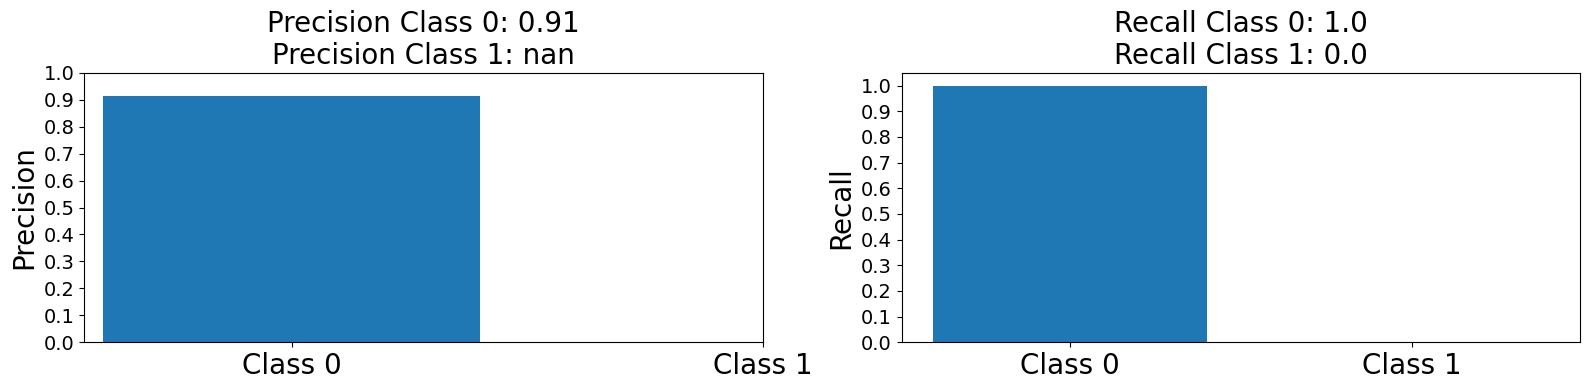

In [15]:
get_precisions_recalls(y_test, preds)

In [16]:
weight_minority_class = np.sum(y_train == 0) / np.sum(y_train == 1)
print(f'Weight of the minority class: {weight_minority_class:.2f}')

Weight of the minority class: 11.00


In [19]:
clf = DecisionTreeClassifier(class_weight={0:1, 1:weight_minority_class})
clf.fit(X_train_mm, y_train)
preds = clf.predict(X_test_mm)

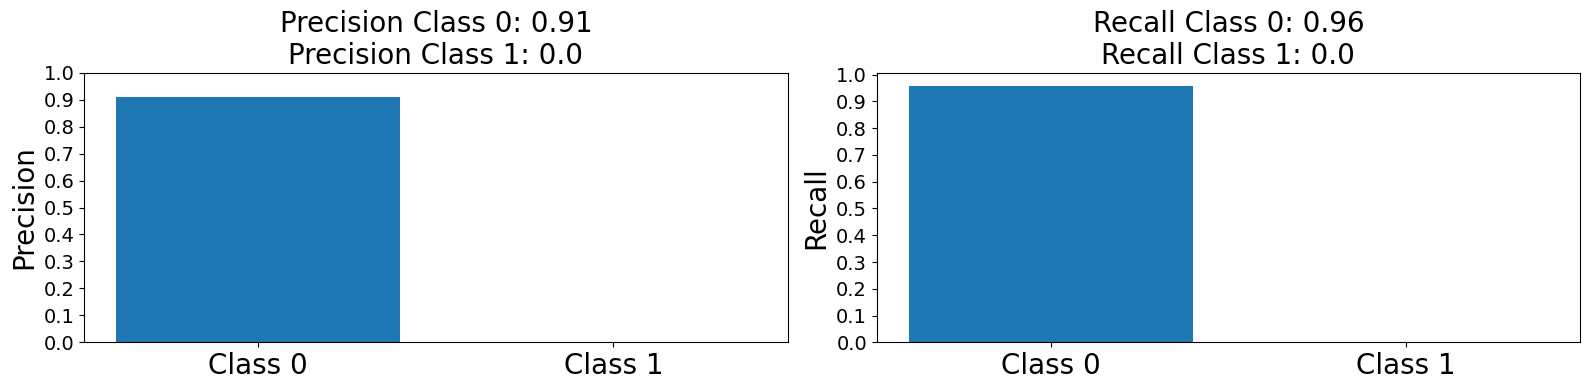

In [20]:
get_precisions_recalls(y_test, preds)

In [21]:
#get indices of each class
indices_0 = np.where(y_train == 0)[0]
indices_1 = np.where(y_train == 1)[0]
indices = np.concatenate([indices_0, indices_1])

#get weights for each class
weights = np.empty(indices_0.shape[0] + indices_1.shape[0])
weights[:indices_0.shape[0]] = 1
weights[indices_0.shape[0]:] = weight_minority_class
weights = weights/np.sum(weights)

#sample new indices
sampled_indices = np.random.choice(indices, indices.shape[0], p=weights)

In [22]:
#consruct oversampled datasets
X_train_oversampled = X_train_mm.iloc[sampled_indices]
y_train_oversampled = y_train.iloc[sampled_indices]

In [23]:
print('Fraction of positive labels in oversampled data:', str(round(100*np.mean(y_train_oversampled),3)) + '%')

Fraction of positive labels in oversampled data: 49.074%


In [24]:
clf = LogisticRegression()
clf.fit(X_train_oversampled, y_train_oversampled)
preds = clf.predict(X_test_mm)

In [35]:
clf.predict_proba(X_train_oversampled)[:,1]

array([9.08164324e-01, 4.87885953e-01, 9.42610252e-01, 6.93923220e-02,
       3.24726267e-01, 8.29711772e-03, 5.70164819e-02, 5.70164819e-02,
       2.56156595e-01, 6.21296421e-01, 9.71636288e-01, 7.90582847e-01,
       6.49300316e-01, 4.87885953e-01, 8.22901980e-01, 1.33585899e-01,
       9.71636288e-01, 2.71834552e-02, 4.87885953e-01, 9.57439591e-01,
       9.08164324e-01, 1.62981254e-01, 1.32920613e-01, 1.20633334e-02,
       9.08164324e-01, 6.21296421e-01, 1.69641942e-01, 2.16562557e-01,
       7.90582847e-01, 3.56089384e-01, 6.67020651e-01, 9.01230701e-01,
       5.32987739e-01, 1.42849274e-01, 7.91298234e-01, 6.98123352e-01,
       5.29466706e-01, 2.06762211e-01, 9.23178184e-01, 2.41306859e-01,
       2.01797920e-02, 8.70308191e-01, 9.01230701e-01, 8.22901980e-01,
       8.02818970e-01, 4.87885953e-01, 7.91298234e-01, 7.90582847e-01,
       7.90582847e-01, 3.23283506e-02, 4.46571541e-02, 2.74948603e-01,
       9.01230701e-01, 2.96060941e-02, 8.31868287e-01, 7.75813463e-01,
      

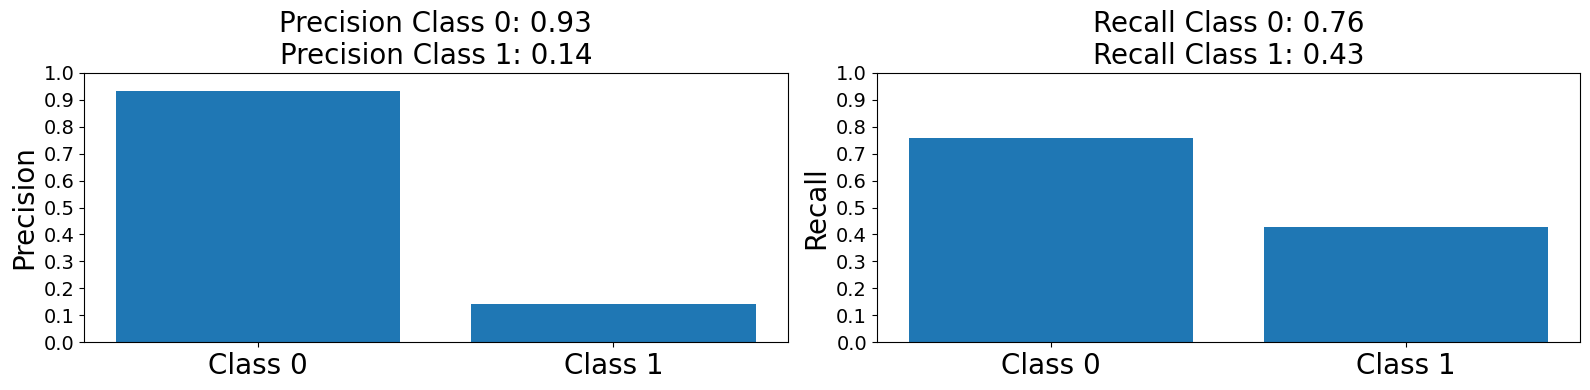

In [25]:
get_precisions_recalls(y_test, preds)

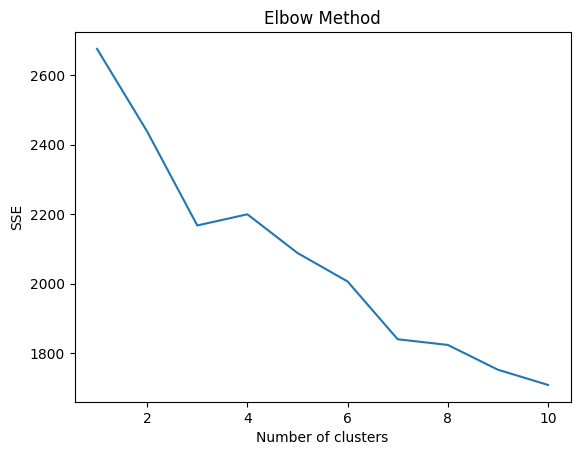

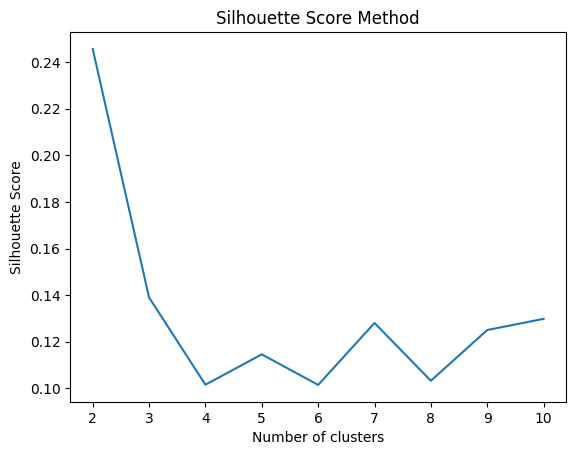

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_oversampled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_oversampled)
    silhouette_scores.append(silhouette_score(X_train_oversampled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


C:\Users\m93107ma\AppData\Local\Temp\ipykernel_23824\1686653423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_oversampled['cluster'] = kmeans.fit_predict(X_train_oversampled)


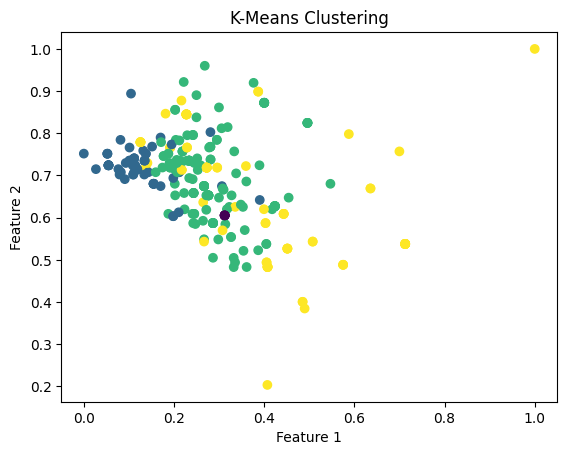

In [42]:
# Optimal number of clusters (choose based on the Elbow and Silhouette methods)
optimal_clusters = 4

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
X_train_oversampled['cluster'] = kmeans.fit_predict(X_train_oversampled)

# Visualize Clusters (if possible)
plt.scatter(X_train_oversampled.iloc[:, 0], X_train_oversampled.iloc[:, 1], c=X_train_oversampled['cluster'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [45]:


# Group by clusters and analyze
cluster_analysis = X_train_oversampled.groupby('cluster').mean()
print(cluster_analysis)

# If you want to see the distribution of falls within each cluster
falls_distribution = y_train_oversampled.groupby('cluster')['fallsBin'].value_counts(normalize=True).unstack()
print(falls_distribution)


             time  time_diff     speed   time_sd  speed_sd  \
cluster                                                      
0        0.312385   0.605398  0.225490  0.118337  0.128219   
1        0.127119   0.721197  0.503735  0.064896  0.233219   
2        0.283135   0.700218  0.262501  0.161432  0.236046   
3        0.382093   0.656300  0.213634  0.230619  0.250354   

         left_knee_range_mean  left_knee_sd  left_knee_max  left_knee_min  \
cluster                                                                     
0                    0.183307      0.320249       0.000000       0.131023   
1                    0.302296      0.494083       0.175985       0.403863   
2                    0.305405      0.545882       0.195281       0.453675   
3                    0.166890      0.271143       0.162010       0.606202   

         left_knee_max_mean  ...  totalMET    PA_cat    avgPEM    avgAAM  \
cluster                      ...                                           
0           

KeyError: 'cluster'

In [228]:
#populate entire dataset
X_train_oversampled_smote = []
y_train_oversampled_smote = []

for _ in range(X_train_mm.shape[0]):
    p = np.random.random()
    #sample from majority class
    if p < 0.5:
        X_train_oversampled_smote.append(X_train_mm.iloc[np.random.choice(indices_0)])
        y_train_oversampled_smote.append(0)
    #sample from minority class
    else:
        #get two random samples from minority class
        minority_samp_1 = X_train_mm.iloc[np.random.choice(indices_1)]
        minority_samp_2 = X_train_mm.iloc[np.random.choice(indices_1)]
        
        #get random proportion with which to mix them
        prop = np.random.random()
        
        #generate synthetic sample from minority class
        synthetic_minority_samp = prop*minority_samp_1 + (1-prop)*minority_samp_2
        X_train_oversampled_smote.append(synthetic_minority_samp)
        y_train_oversampled_smote.append(1)
        
X_train_oversampled_smote = pd.DataFrame(np.array(X_train_oversampled_smote), columns=X_train.columns)
y_train_oversampled_smote = np.array(y_train_oversampled_smote)

In [229]:
print('Fraction of positive labels in SMOTE oversampled data:', str(round(100*np.mean(y_train_oversampled_smote),3)) + '%')


Fraction of positive labels in SMOTE oversampled data: 55.556%


In [ ]:
unique_naive_oversample = np.unique(X_train_oversampled[y_train_oversampled == 1], axis=0).shape[0]
unique_smote_oversample = np.unique(X_train_oversampled_smote[y_train_oversampled_smote == 1], axis=0).shape[0]

print('Num Unique Class=1 Feature Vectors with Naive Oversample:', unique_naive_oversample)
print('Num Unique Class=1 Feature Vectors with SMOTE Oversample:', unique_smote_oversample)

In [230]:
X_train_oversampled_smote

,time,time_diff,speed,time_sd,speed_sd,left_knee_range_mean,left_knee_sd,left_knee_max,left_knee_min,left_knee_max_mean,...,totalMET,PA_cat,avgPEM,avgAAM,totalSEE,numMedCond,EthCat,backpain,depression,highBP
0,0.555050,0.506564,0.095670,0.499731,0.302483,0.265309,0.402552,0.164225,0.443874,0.533481,...,0.276100,0.848338,0.572407,0.497631,0.264301,0.151662,0.000000,0.151662,0.0,0.151662
1,0.401401,0.741653,0.166667,0.197232,0.181063,0.241964,0.464402,0.184195,0.518703,0.598535,...,0.245574,0.729053,0.374924,0.760953,0.609914,0.541895,0.000000,0.541895,0.0,0.541895
2,0.083898,0.713188,0.588235,0.003614,0.040641,0.158246,0.219075,0.131976,0.589654,0.440602,...,0.025707,0.000000,0.666667,0.736842,0.383721,0.000000,0.142857,0.000000,0.0,0.000000
3,0.134348,0.722969,0.500467,0.082047,0.254472,0.230513,0.353059,0.208738,0.562294,0.627398,...,0.089807,0.903601,0.516067,0.441347,0.389326,0.322300,0.774515,0.096399,0.0,0.096399
4,0.213035,0.768689,0.326800,0.120058,0.204349,0.181270,0.353291,0.195790,0.619610,0.596745,...,0.228941,1.000000,0.624989,0.622800,0.746126,0.291701,0.083343,0.000000,0.0,0.583402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.323675,0.810588,0.233607,0.164628,0.205887,0.377833,0.680059,0.216937,0.368600,0.692649,...,0.054271,0.500000,0.311476,0.588869,0.392680,0.598358,0.000000,0.598358,0.0,0.598358
320,0.211436,0.825912,0.329303,0.187432,0.321714,0.179530,0.308485,0.191532,0.670509,0.619022,...,0.184844,0.913705,0.683869,0.638792,0.680380,0.043148,0.024656,0.000000,0.0,0.000000
321,0.125896,0.735133,0.470588,0.030925,0.119765,0.285718,0.466673,0.154371,0.402296,0.483367,...,0.201843,1.000000,0.388889,0.631579,0.395349,0.250000,0.000000,0.000000,0.0,0.000000
322,0.257751,0.690216,0.296068,0.122714,0.155681,0.183653,0.376889,0.193463,0.568131,0.571663,...,0.194454,0.771379,0.580958,0.590980,0.684038,0.614310,0.110197,0.228621,0.0,1.000000


In [245]:
clf = LogisticRegression()
clf.fit(X_train_oversampled_smote, y_train_oversampled_smote)
preds = clf.predict(X_test_mm)

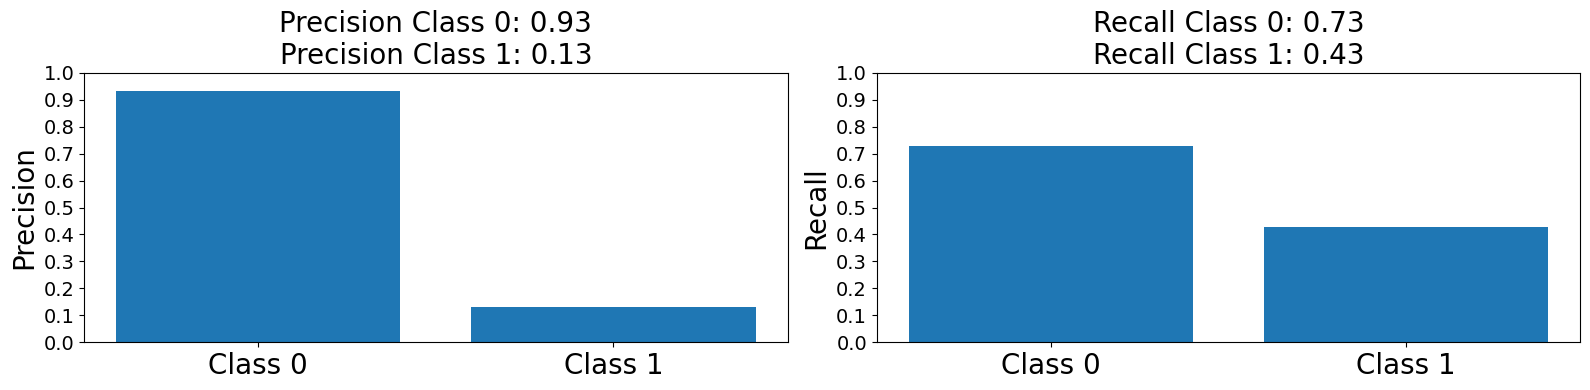

In [246]:
get_precisions_recalls(y_test, preds)